# Extended Isolation Forest
## Scalability performance study

In [126]:
import sys
sys.path.append("D:/skola/dip/h2o-3/h2o-py/build") # path to h2o build
sys.path.append("D:/skola/dip/eif") # path to eif_old.py file (git clone https://github.com/sahandha/eif.git)

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import eif_old as iso
import time
import math
import h2o
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2OExtendedIsolationForestEstimator
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

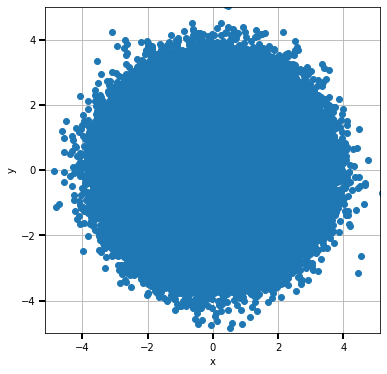

In [128]:
seed = 1234
N = 1_500_000
ntrees = 100
sample_size = 15_000
max_depth = int(math.log(sample_size, 2))

blobs_params = dict(random_state=seed, n_samples=N, n_features=2)
X = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=1, **blobs_params)[0]

fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o')
plt.grid("off")
plt.axis("equal")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("x")
plt.ylabel("y")
plt.tick_params(direction='out', length=6, width=2)
plt.show()

In [129]:
def test_train(nthreads):
    h2o.init(nthreads=nthreads)
    hf = h2o.H2OFrame(X,column_names = ["x", "y"])
    start = time.time()
    EIF_h2o = H2OExtendedIsolationForestEstimator(model_id = "extended_isolation_forest.hex",
                                         ntrees = ntrees, seed = seed, sample_size = sample_size, extension_level = 1)
    EIF_h2o.train(training_frame = hf)
    end = time.time()
    eif_time = end - start
    print(f"EIF Time: {eif_time}s")
    start = time.time()
    IF_h2o = H2OIsolationForestEstimator(model_id = "isolation_forest.hex",
                                     ntrees = ntrees, seed = seed, sample_size = sample_size, max_depth = max_depth)
    IF_h2o.train(training_frame = hf)
    end = time.time()
    if_time = end - start
    print(f"IF Time: {if_time}s")
    h2o.cluster().shutdown()
    return eif_time, if_time


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmptl_s296v
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmptl_s296v\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmptl_s296v\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_h9tn0s
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 73.55445837974548s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 29.758898973464966s
H2O session _sid_94ce closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpiisq3cit
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpiisq3cit\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpiisq3cit\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_vjl6sp
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 73.17858242988586s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 30.756670236587524s
H2O session _sid_9dca closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp5apavwde
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp5apavwde\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp5apavwde\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_k1cn1e
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 71.93811750411987s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 30.44054675102234s
H2O session _sid_a110 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpnu6tiwgm
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpnu6tiwgm\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpnu6tiwgm\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_fgutla
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 72.18008518218994s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 32.28302597999573s
H2O session _sid_a851 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmph6l0b2ll
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmph6l0b2ll\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmph6l0b2ll\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_9dwg8m
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 71.03172945976257s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 30.059970378875732s
H2O session _sid_905d closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpjlfyfrd4
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpjlfyfrd4\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpjlfyfrd4\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_rc0pn3
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 71.29320168495178s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 30.61516308784485s
H2O session _sid_ac70 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp8wug7rb8
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp8wug7rb8\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp8wug7rb8\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_z1vfeh
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 70.8510377407074s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 30.682520389556885s
H2O session _sid_ac34 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp_iu9lvwt
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp_iu9lvwt\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp_iu9lvwt\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_ljya10
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 70.41225385665894s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 32.00245237350464s
H2O session _sid_8378 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpq34292v2
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpq34292v2\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpq34292v2\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_2tvkqm
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 79.95378422737122s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 29.901967525482178s
H2O session _sid_ab33 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpglniiofm
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpglniiofm\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpglniiofm\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_5w44mz
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 74.70798468589783s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 31.492769718170166s
H2O session _sid_9b14 closed.
EIF 72.91012351512909s
IF 30.7993985414505s
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpgrwwkvto
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpgrwwkvto\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpgrwwkvto\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_yw8n14
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 64.28813576698303s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 30.22508716583252s
H2O session _sid_92ae closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpqwfonpp2
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpqwfonpp2\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpqwfonpp2\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_77duxz
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 66.58770370483398s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 30.25144934654236s
H2O session _sid_b718 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpfsi48dya
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpfsi48dya\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpfsi48dya\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_9or7tl
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 65.82031154632568s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 29.83929133415222s
H2O session _sid_9765 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmph6bmuk2b
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmph6bmuk2b\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmph6bmuk2b\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_h4razb
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 67.15528297424316s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 29.839484214782715s
H2O session _sid_b633 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmplq50u4vx
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmplq50u4vx\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmplq50u4vx\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_a1cn31
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 66.86392045021057s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 29.480579614639282s
H2O session _sid_b94b closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmperl6glts
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmperl6glts\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmperl6glts\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_7v4gps
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 65.86972141265869s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 32.16007161140442s
H2O session _sid_aa59 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp4xkk5qrz
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp4xkk5qrz\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp4xkk5qrz\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_vq5dmk
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 122.13001608848572s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 48.99989914894104s
H2O session _sid_9e08 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmprg53gkd_
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmprg53gkd_\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmprg53gkd_\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_9u4ae8
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 113.26484394073486s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 84.81244564056396s
H2O session _sid_8f7a closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp65evaqw8
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp65evaqw8\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp65evaqw8\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_1lclmc
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 325.86938643455505s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 133.44018149375916s
H2O session _sid_88a9 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpst4wwdyi
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpst4wwdyi\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpst4wwdyi\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_2cywl5
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 104.039719581604s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 45.61509156227112s
H2O session _sid_a1ab closed.
EIF 106.18890419006348s
IF 49.46635811328888s
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmptwnkw7c_
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmptwnkw7c_\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmptwnkw7c_\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_lyn623
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 69.32019972801208s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 51.14500141143799s
H2O session _sid_ac2d closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp6kij9ugh
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp6kij9ugh\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp6kij9ugh\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_00dgz9
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 69.1601037979126s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 54.240079164505005s
H2O session _sid_8b37 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpkfydyamw
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpkfydyamw\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpkfydyamw\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_dv0b1b
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 69.53938961029053s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 54.70948338508606s
H2O session _sid_89e6 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp71l33g4k
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp71l33g4k\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp71l33g4k\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_jvrbni
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 70.70637655258179s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 54.109699964523315s
H2O session _sid_8d89 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp1glyr7zu
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp1glyr7zu\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp1glyr7zu\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_m0rdzg
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 71.42507553100586s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 54.27970886230469s
H2O session _sid_b394 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpuge6l67m
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpuge6l67m\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpuge6l67m\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_v62ak9
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 66.12169861793518s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 53.08553194999695s
H2O session _sid_89d8 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp5kwgueaz
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp5kwgueaz\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp5kwgueaz\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_dcywav
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 70.2550437450409s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 54.04179501533508s
H2O session _sid_a4f2 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpyi3dwn7x
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpyi3dwn7x\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpyi3dwn7x\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_dhwzr5
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 72.8486430644989s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 56.809489727020264s
H2O session _sid_9022 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpyhq8e9ig
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpyhq8e9ig\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpyhq8e9ig\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_33ox2a
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 71.96104335784912s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 54.73865079879761s
H2O session _sid_b49e closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp67urf95p
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp67urf95p\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp67urf95p\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_685106
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 71.03481316566467s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 51.130553245544434s
H2O session _sid_a601 closed.
EIF 70.23723871707917s
IF 53.82899935245514s
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpdvta4som
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpdvta4som\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpdvta4som\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_n86l17
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 40.26997232437134s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 76.47024583816528s
H2O session _sid_9afe closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp1_8c976e
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp1_8c976e\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp1_8c976e\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_8yypqb
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 38.7297637462616s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 75.50976800918579s
H2O session _sid_b536 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpcpq57zgt
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpcpq57zgt\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpcpq57zgt\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_yigohb
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 38.25999093055725s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 72.42498016357422s
H2O session _sid_8c9e closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp1st0r22e
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp1st0r22e\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp1st0r22e\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_ldb6rk
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 40.668126583099365s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 69.23954582214355s
H2O session _sid_8821 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp8_13jgr8
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp8_13jgr8\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp8_13jgr8\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_j9n5ei
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 28.910042762756348s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 54.36026668548584s
H2O session _sid_8602 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp9vh74vr7
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp9vh74vr7\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp9vh74vr7\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_yuits0
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 28.739763021469116s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 60.45995259284973s
H2O session _sid_a812 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpe22qy3mi
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpe22qy3mi\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpe22qy3mi\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_ek0vpb
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 28.769556999206543s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 56.48894023895264s
H2O session _sid_b902 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpd3o_vypt
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpd3o_vypt\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpd3o_vypt\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_dc09o4
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 27.60962224006653s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 60.25993037223816s
H2O session _sid_b82c closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp2u46wngm
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp2u46wngm\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp2u46wngm\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_qyxwq5
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 28.029795169830322s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 55.64025282859802s
H2O session _sid_9cfe closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpxi37r9xl
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpxi37r9xl\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpxi37r9xl\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_en4ja9
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 27.83001184463501s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 57.70026206970215s
H2O session _sid_b4c5 closed.
EIF 32.781664562225345s
IF 63.85541446208954s
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpc0ik15h9
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpc0ik15h9\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpc0ik15h9\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_btfrub
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 31.91993737220764s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 104.9299066066742s
H2O session _sid_8983 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmppwxl2372
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmppwxl2372\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmppwxl2372\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_f0ef2o
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 30.980363130569458s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 105.08990573883057s
H2O session _sid_bec4 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp5bbgv71b
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp5bbgv71b\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp5bbgv71b\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_tnwr8v
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 31.573181629180908s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 97.75524806976318s
H2O session _sid_b778 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp7viyal3m
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp7viyal3m\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp7viyal3m\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_dqdxxj
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 30.884902477264404s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 102.9482889175415s
H2O session _sid_a8fe closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp3_wd5s3l
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp3_wd5s3l\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp3_wd5s3l\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_zb291a
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 30.16998052597046s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 102.18013644218445s
H2O session _sid_83fe closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpn6xq8jz_
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpn6xq8jz_\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpn6xq8jz_\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_fvm596
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 29.640185594558716s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 96.23952317237854s
H2O session _sid_b765 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpextnstqd
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpextnstqd\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpextnstqd\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_ig3jxq
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 29.96136999130249s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 98.65531396865845s
H2O session _sid_8472 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp7bvdpvr1
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp7bvdpvr1\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp7bvdpvr1\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_h7hpsu
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 40.38195848464966s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 109.26491332054138s
H2O session _sid_b131 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpzjey7_z2
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpzjey7_z2\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpzjey7_z2\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_4zhqfh
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 32.80000925064087s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 104.86989307403564s
H2O session _sid_871b closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmpt8cq7nht
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmpt8cq7nht\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmpt8cq7nht\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_potte_m6niit
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
extendedisolationforest Model Build progress: |███████████████████████████| 100%
EIF Time: 32.78995442390442s
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 113.4302568435669s
H2O session _sid_a1b9 closed.
EIF 32.110184288024904s
IF 103.53633861541748s
12 - EIF = 72.91012351512909, IF = 30.7993985414505
8 - EIF = 106.18890419006348, IF = 49.46635811328888
4 - EIF = 70.23723871707917, IF = 53.82899935245514
2 - EIF = 32.781664562225345, IF = 63.85541446208954
1 - EIF = 32.110184288024904, IF = 103.53633861541748
EIF
{12: 72.91012351512909, 8: 106.18890419006348, 4: 70.23723871707917, 2: 32.781664562225345, 1: 32.110184288024904}
IF
{12: 30.7993985414505, 8: 49.46635811328888, 4: 53.82899935245514, 2: 63.85541446208954, 1: 103.53633861541748}
12
72.91012351512909
8
106.18890419006348
4
70.23723871707917
2
32.781664562225345
1
32.110184288024904
12
30.7993985414505
8

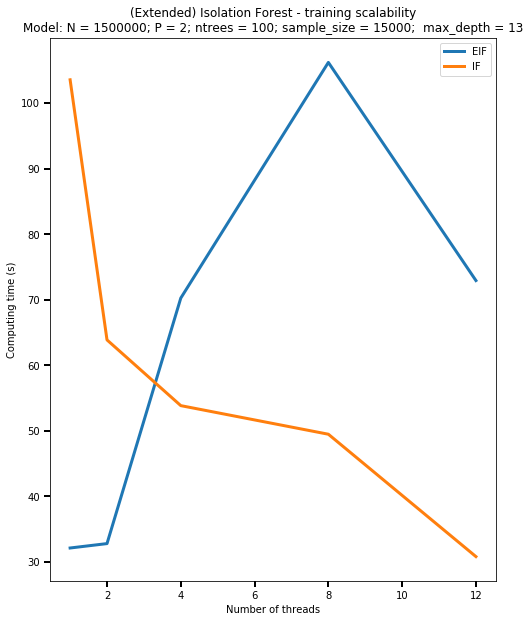

In [130]:
mtries = 10
threds = [12, 8, 4 , 2, 1]

all_times = []
all_times_num_eif = []
all_times_num_if = []
for nthreads in threds:
    times_eif = []
    times_if = []
    for i in range(mtries):
        eif_time, if_time = test_train(nthreads)
        times_eif.append(eif_time)
        times_if.append(if_time)
    print(f"EIF {np.mean(times_eif)}s")
    print(f"IF {np.mean(times_if)}s")
    all_times_num_eif.append(times_eif)
    all_times_num_if.append(times_if)
    all_times.append(f"thread {nthreads} - EIF {np.mean(times_eif)}s and IF {np.mean(times_if)}s")
    
sample_256_max_depth_log_eif = dict()
sample_256_max_depth_log_if = dict()
for i, nthreads in enumerate(threds):
    print(f"{nthreads} - EIF = {np.mean(all_times_num_eif[i])}, IF = {np.mean(all_times_num_if[i])}")
    sample_256_max_depth_log_eif[nthreads] = np.mean(all_times_num_eif[i])
    sample_256_max_depth_log_if[nthreads] = np.mean(all_times_num_if[i])

print("EIF")
print(sample_256_max_depth_log_eif)
print("IF")
print(sample_256_max_depth_log_if)

data = {"x":[], "y": [], "label":[]}
for label, coord in sample_256_max_depth_log_eif.items():
    print(label)
    print(coord)
    data["x"].append(label)
    data["y"].append(coord)

data_if = {"x":[], "y": [], "label":[]}
for label, coord in sample_256_max_depth_log_if.items():
    print(label)
    print(coord)
    data_if["x"].append(label)
    data_if["y"].append(coord)    

fig=plt.figure(figsize=(8,10))
fig.add_subplot(111)
plt.plot(data['x'], data['y'], '-', label="EIF", linewidth=3)
plt.plot(data_if['x'], data_if['y'], '-', label="IF", linewidth=3)
# plt.grid("off")
plt.xlabel("Number of threads")
plt.ylabel("Computing time (s)")
plt.legend()
plt.tick_params(direction='out', length=6, width=2) 
plt.title(f"(Extended) Isolation Forest - training scalability\nModel: N = 1500000; P = 2; ntrees = {ntrees}; sample_size = {sample_size};  max_depth = {max_depth}")
plt.savefig(f"h2o-scale-perf_{sample_size}_{N}_{coord}.eps", bbox_inches='tight', pad_inches=.05)
plt.savefig(f"h2o-scale-perf_{sample_size}_{N}_{coord}.pdf", bbox_inches='tight', pad_inches=.05)
plt.show()


In [44]:
print(all_times_num_if)
print(all_times_num_eif)
print(all_times)

[[19.672342777252197, 20.53502607345581, 19.87462878227234, 19.908703565597534, 18.980705738067627, 19.75950336456299, 18.642748594284058, 18.202144861221313, 20.069458961486816, 18.68135690689087], [19.81078314781189, 20.57333731651306, 21.250260591506958, 21.326552867889404, 22.17860746383667, 22.286158561706543, 21.461563110351562, 22.279206037521362, 21.172695636749268, 20.275078058242798], [26.00801968574524, 26.411422729492188, 26.98170757293701, 25.64406394958496, 26.061084032058716, 25.734219789505005, 26.46064519882202, 25.529783010482788, 26.272348165512085, 25.714040517807007], [38.77704977989197, 38.94839119911194, 40.23340654373169, 40.30915427207947, 40.37308359146118, 41.406450271606445, 40.408451080322266, 40.25383162498474, 40.48889422416687, 38.59671187400818], [70.22407579421997, 72.26861953735352, 69.66379356384277, 70.69624662399292, 70.27181053161621, 69.26559853553772, 70.22999024391174, 74.55966877937317, 70.23043942451477, 66.74626278877258]]
[[137.523073434829

In [71]:
h2o.init(nthreads=12)
hf = h2o.H2OFrame(X,column_names = ["x", "y"])

start = time.time()
IF_h2o = H2OIsolationForestEstimator(model_id = "isolation_forest.hex",
                                 ntrees = ntrees, seed = seed, sample_size = sample_size, max_depth = max_depth)
IF_h2o.train(training_frame = hf)
end = time.time()
if_time = end - start
print(f"IF Time: {if_time}s")
h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.60-b23, mixed mode)
  Starting server from D:\skola\dip\h2o-3\build\h2o.jar
  Ice root: C:\Users\potte\AppData\Local\Temp\tmp3n_ig70w
  JVM stdout: C:\Users\potte\AppData\Local\Temp\tmp3n_ig70w\h2o_potte_started_from_python.out
  JVM stderr: C:\Users\potte\AppData\Local\Temp\tmp3n_ig70w\h2o_potte_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Europe/Prague
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.99999
H2O cluster version age:,2 days
H2O cluster name:,H2O_from_python_potte_16feyn
H2O cluster total nodes:,1
H2O cluster free memory:,21.27 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
isolationforest Model Build progress: |███████████████████████████████████| 100%
IF Time: 49.78067636489868s
H2O session _sid_a964 closed.


12 - EIF = 144.42591614723204, IF = 19.432661962509155
8 - EIF = 134.0580631494521, IF = 21.261424279212953
4 - EIF = 72.80119981765748, IF = 26.081733465194702
2 - EIF = 47.28469135761261, IF = 39.97954244613648
1 - EIF = 48.60738940238953, IF = 70.41565058231353


{12: 144.42591614723204,
 8: 134.0580631494521,
 4: 72.80119981765748,
 2: 47.28469135761261,
 1: 48.60738940238953}

12
144.42591614723204
8
134.0580631494521
4
72.80119981765748
2
47.28469135761261
1
48.60738940238953
12
19.432661962509155
8
21.261424279212953
4
26.081733465194702
2
39.97954244613648
1
70.41565058231353


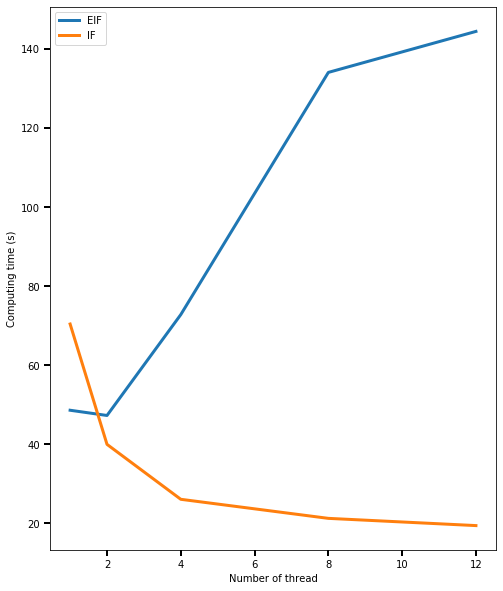

In [99]:
data = {"x":[], "y": [], "label":[]}
for label, coord in sample_30000_max_depth_8_eif.items():
    print(label)
    print(coord)
    data["x"].append(label)
    data["y"].append(coord)
    
data_if = {"x":[], "y": [], "label":[]}
for label, coord in sample_30000_max_depth_8_if.items():
    print(label)
    print(coord)
    data_if["x"].append(label)
    data_if["y"].append(coord)    
    
fig=plt.figure(figsize=(8,10))
fig.add_subplot(111)
plt.plot(data['x'], data['y'], '-', label="EIF", linewidth=3)
plt.plot(data_if['x'], data_if['y'], '-', label="IF", linewidth=3)
# plt.grid("off")
plt.xlabel("Number of thread")
plt.ylabel("Computing time (s)")
plt.legend()
plt.tick_params(direction='out', length=6, width=2) 
plt.show()

# Acronyms

* IF = Isolation Forest
* EIF = Extended Isolation Forest
* Ex0 = extension_level parameter = 0. It means that Extended Isolation Forest behave like Isolation Forest.
* Ex1 = extension_level parameter = 1

# Bibliography

* [1] sahandha /eif: https://github.com/sahandha/eif
* [2] S. Hariri, M. Carrasco Kind and R. J. Brunner, "Extended Isolation Forest," in IEEE Transactions on Knowledge and Data Engineering, doi: 10.1109/TKDE.2019.2947676. Available from:http://dx.doi.org/10.1109/TKDE.2019.2947676